In [45]:
##### Action 1 - MovieLens预测 ########

# !pip install scikit-surprise
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import BaselineOnly, KNNBasic, KNNBaseline, SlopeOne, SVD, SVDpp, KNNWithMeans, NMF
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd
import chardet

# 读取物品（电影）名称信息
# path = '/content/drive/My Drive/Colab Notebooks/datasets/movies.txt'
# with open(path, 'rb') as f:
#     result = chardet.detect(f.read())
# data = pd.read_csv(path,encoding=result['encoding']) #Pandas无法自动Decode
# rid_to_name = {}
# name_to_rid = {}
# for i in range(len(data['movieId'])):
#     rid_to_name[data['movieId'][i]] = data['title'][i]
#     name_to_rid[data['title'][i]] = data['movieId'][i]

# print(rid_to_name)
# print(name_to_rid)


rattings_file = '/content/drive/My Drive/Colab Notebooks/datasets/ratings_small.txt'

# 数据读取
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)
data = Dataset.load_from_file(rattings_file, reader=reader)
trainset, testset = train_test_split(data, test_size=.25)

#CV不同的算法，查看表现
algorithms = [BaselineOnly, KNNBasic, KNNBaseline, SlopeOne, SVD, KNNWithMeans, NMF]
for algorithm in algorithms:
  print('########使用算法: %s ########' % algorithm)
  cross_validate(algorithm(), data, verbose=True, cv=3)

  # # 对指定用户和商品进行评分预测
  uid = str(196) 
  iid = str(302) 
  pred = algo.predict(uid, iid, r_ui=4, verbose=True)





########使用算法: <class 'surprise.prediction_algorithms.baseline_only.BaselineOnly'> ########
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9025  0.8955  0.8937  0.8972  0.0038  
MAE (testset)     0.6977  0.6938  0.6903  0.6940  0.0030  
Fit time          0.26    0.26    0.26    0.26    0.00    
Test time         0.36    0.18    0.28    0.28    0.07    
user: 196        item: 302        r_ui = 4.00   est = 3.77   {'was_impossible': False}
########使用算法: <class 'surprise.prediction_algorithms.knns.KNNBasic'> ########
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

               

In [0]:
##### Action 2 - Paper Reading ########
#https://arxiv.org/pdf/cs/0702144.pdf

#paper写的真好
#1. 框架清晰，介绍算法逻辑，提出评价标准，对比不同的算法的概念，最后用统一的数据集证明Slope one的表现的价值
#2. 对于Model-Based & Memory-Based的model的抽象更对比（前者学习慢但查询快），可以帮助读者在宏观上理解两种算法的区别
#3. 文中在Slope One的基础上发展的Bi-polar SlopeOne，将用户的评分分为like组和dislike组，double了用户data的数量（同时也对rating数据做了filter），得到了更好的效果


#SlopeOne原理
# Step1. 计算Item之间的评分差均值
# Step2. 利用用户历史评分u + Step1中的Item两两评分差均值，预测缺失值
# Step3. 利用Step2的预测值进行推荐



根据词频，开始生成词云!


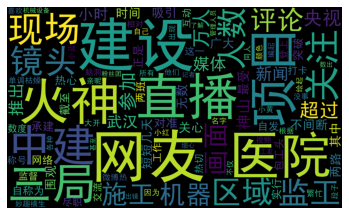

In [46]:
##### Action 3 - Wordcloud ########


# -*- coding:utf-8 -*-
# 词云展示
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import jieba

# 去掉停用词
def remove_stop_words(f):
	stop_words = ['一个', '公司']
	for stop_word in stop_words:
		f = f.replace(stop_word, '')
	return f

# 生成词云
def create_word_cloud(f):
	print('根据词频，开始生成词云!')
	f = remove_stop_words(f)
	cut_text = jieba.cut(f)
	#print(cut_text)
	cut_text = " ".join(cut_text)
	wc = WordCloud(
		font_path="/content/drive/My Drive/Colab Notebooks/Fonts/SimHei.ttf",
		max_words=100,
		width=2000,
		height=1200,
    )
	wordcloud = wc.generate(cut_text)
	# 写词云图片
	wordcloud.to_file("wordcloud.jpg")
	# 显示词云文件
	plt.imshow(wordcloud)
	plt.axis("off")
	plt.show()

# 数据加载
text = '一个超过5000万人关注的大项目，您参加了吗?央视新闻新媒体推出武汉火神山、雷神山医院建设现场24小时不间断直播，短短几天时间吸引无数关心医院建设的网友围观。其中最受广大网友关注的火神山两路镜头对准的正是中建三局三公司承建区域，截至30日13:50，在看人数已突破5000万。热心的网友们自称为“云监工”或“网络包工头”，自发在评论区实行“两班倒”打卡“监督”还热切、尽职的互动交流起了“工作”。这一称号数度登上微博热搜。繁忙却相对单调枯燥的施工画面，因为“云监工”们脑洞大开的评论而妙趣横生，他们给所有的机器都起好了名字，根据颜色亲昵的叫上了小红、小黄、小蓝，没事就来视频里蹲自己喜欢的机器出现还编起了段子，绘起了同人。不仅现场的各种机械设备有了“粉丝团”，有细心者甚至数出了直播画面中中建三局三公司这一施工区域中出镜的管理人员与工友人数。记者了解到，火神山医院建设方之一的中建三局三公司在四川也有不少项目，德阳市妇女儿童专科医院项目也是该公司在建设。最后，让我们一起以比直播镜头更近、更鲜活的视角来重温让万千网友为之惊叹鼓舞的奋斗时刻!'
# 生成词云
create_word_cloud(text)

In [10]:
#!pip install scikit-surprise
from surprise import Dataset
from surprise.model_selection import cross_validate,train_test_split
from surprise import Reader
from surprise import BaselineOnly, KNNBasic, KNNBaseline, SlopeOne, SVD, SVDpp, KNNWithMeans, NMF
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd
import chardet
import time

t1 = time.time()
rattings_file = '/content/drive/My Drive/Colab Notebooks/datasets/ratings_small.txt'

# Load the movielens-100k dataset (download it if needed),
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)
data = Dataset.load_from_file(rattings_file, reader=reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVDpp()


# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

# # 对指定用户和商品进行评分预测
uid = str(196) 
iid = str(302) 
pred = algo.predict(uid, iid, r_ui=4, verbose=True)
print(time.time()-t1)

RMSE: 0.8884
user: 196        item: 302        r_ui = 4.00   est = 3.85   {'was_impossible': False}
364.45126605033875
